# Assignment 3 - Machine Learning Basics

1.) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this than what exists in the readings.

Machine learning is not a catch-all method of solving problems, instead, it is a tool which, when combined with appropriate alternatives, can solve more complex problems than those alternatives could on their own. Let's take, for example, the case of an email inbox. For simple tasks——those requiring straightforward iteration——one should not jump to machine learning. Take, say, the task of "Pinning" an email in your inbox, so it sits at the top of all emails until deselected. Given this is a simple, binary task, it would make no sense to program based on machine learning: you don't want your gmail to predict if it should pin the message or not, you simply want it to follow your command. In another example, let's say we want to determine——based on an email's subject line——IF a message would be pinned or not. At first glance, it appears as if we could again utilize loops, classes, and simple functions——perhaps, iterating for certain words and their rate of occurence. However, it wouldn't take too long to realize the absurd length of time it would take to include in our program every "correct" response, even excluding the emails which are flooding in our inbox right now. Instead, it'd be wise to use Machine Learning, given——especially with proper supervision, and test/training data——to create a multivariate regression, or "black box", best fit to our inbox. If the correlation between this model and emails you'd actually pin is high, you've saved yourself from the mountain of effort attempting to create its half-baked, terribly ineffecient, "while" loop cousin. This is machine learning's essential advantage over simpler functions: predicting over data of scale or complexity too vast for simple functions. Because while you may not need Machine Learning to determine tomorrow's date, you most certainly will to predict its weather.

2.) Perform pre-processing on the dataset. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. Depending on your dataset you may need to create new columns from the existent data you have.

In [2]:
import numpy as np
import pandas as pd

/var/folders/jq/xzwg3k5d0nqb3574ynkvzc740000gn/T/ipykernel_46631/1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Step 1 — Removing whitespace from the column names:

In [3]:
tt_df = pd.read_csv('../Misc./titanic_test_data.csv')
tt_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
tt_df.columns = tt_df.columns.str.strip()
tt_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Step 2 - Renaming the departure locations from letters to their respective names:

In [5]:
tt_df['Embarked']

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [6]:
tt_df['embarked'] = np.where(tt_df['Embarked'] == "C", "Cherbourg",
                             np.where(tt_df['Embarked'] == "Q", "Queenstown", "Southampton"))
tt_df['embarked']

0       Queenstown
1      Southampton
2       Queenstown
3      Southampton
4      Southampton
          ...     
413    Southampton
414      Cherbourg
415    Southampton
416    Southampton
417      Cherbourg
Name: embarked, Length: 418, dtype: object

Step 3 - Replace "sex" with 0 (female) and 1 (male):

In [7]:
tt_df['sex'] = tt_df['Sex'].replace({'male': 0, 'female': 1})
tt_df['sex']

/var/folders/jq/xzwg3k5d0nqb3574ynkvzc740000gn/T/ipykernel_46631/3861500441.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tt_df['sex'] = tt_df['Sex'].replace({'male': 0, 'female': 1})


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: sex, Length: 418, dtype: int64

Step 4 - Underscore remaining, capitalized columns:

In [8]:
tt_df.rename(columns={'PassengerId': 'id',
                      'Pclass': 'class', 
                      'Name': 'name',
                      'Age': 'age',
                      'SibSp': 'sibs_spouse',
                      'Parch': 'parents_kids',
                      'Ticket': 'ticket',
                      'Fare': 'fare',
                      'Cabin': 'cabin'}, inplace = True)
tt_df.columns

Index(['id', 'class', 'name', 'Sex', 'age', 'sibs_spouse', 'parents_kids',
       'ticket', 'fare', 'cabin', 'Embarked', 'embarked', 'sex'],
      dtype='object')

3.) Create a correlation matrix with a heatmap for the features. Use markdown to write about your takeaways in under 200 words. Perform feature selection from this. You should likely not be selecting more than 10 features. 

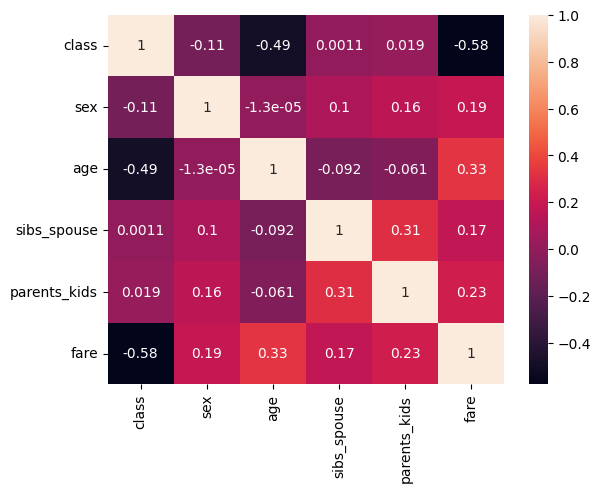

In [32]:
import seaborn as sns

tt_heatmap = tt_df[['class', 'sex', 'age', 'sibs_spouse', 'parents_kids', 'fare']]
tt_correlation = tt_heatmap.corr()
tt_heatmap = sns.heatmap(tt_correlation, annot = True)

Based on the above heatmap, I can tell that several features have at least some correlation, in mostly intuitive ways. The strongest correlation resides in fare vs. class, with an r-squared of -0.58, implying a strong(ish), negative correlation between the two. This is quite understandable, given that 1 is the wealthiest class——containing those who pay the most for their tickets——and that as the value of the class rises to 2 and 3——the middle and lower-classes, respecitvely——the fare price falls. In a similar vein, the age vs. fare price——the third-strongest correlation——makes some sense, given that adults and seniors were more likely to have enough money to pay premiums for first and second class, as opposed to teens and children. Also in terms of family, the number of sibilings/spouses vs. parents/kids makes quite a bit of sense, given the prevalence of families in the dataset, with overlapping values for both those metrics.

In [37]:
correlation_cutoff = 0.3
features_for_selection = tt_correlation['fare'][tt_correlation['fare'].abs() > correlation_cutoff]
print(features_for_selection)

class   -0.577673
age      0.331057
fare     1.000000
Name: fare, dtype: float64


4.) Create a box and whisker plot for loan_amounts if using the Lending Club dataset and fare if using the Titanic dataset. How do you handle the null values? What does this box and whisker plot show you?

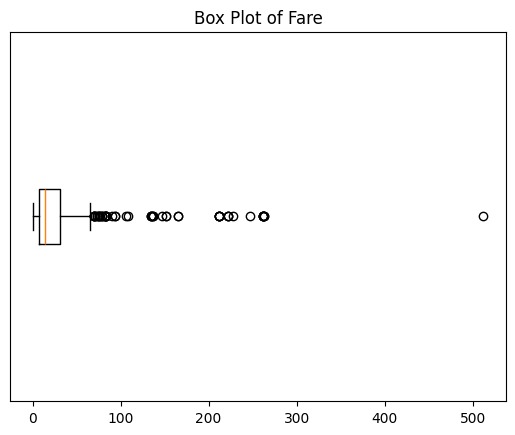

In [16]:
import matplotlib.pyplot as plt

tt_df.dropna(subset = ['fare'], inplace = True)
plt.boxplot(tt_df['fare'], vert = False)
plt.title('Box Plot of Fare')
plt.yticks([])
plt.show()

To "handle" null values here, I used the "dropna()" function to drop all null values from the "fare" columns, specifying that column with  "subset", and "inplace" to apply the change right there, as opposed to creating an entirely new variable to work with.

This box and whisker plot displays a median in the left half of its interquartile range, and that interquartile range situated closer to the Q1 outlier cutoff than the Q3 outlier cutoff. Coupled with the thick cluster of outliers ranging from 100-500, I interpret the fare prices as having a strong right (negative) skew, indicating a mean greater than the median.

5.) If using the Lending Club dataset: create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. If using the Titanic dataset: create a new column called age_bin that groups people into at least 4 age ranges.
- Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in markdown. (use a timer to determine performance: check useful references below to see how timers work) 

In [12]:
import time

In [13]:
start = time.time()

tt_df['age_bin'] = tt_df['age'].apply(lambda age: 'Kid' if age <= 12
                                      else 'Teen' if age <= 18
                                      else 'Adult' if age <= 60
                                      else 'Senior')

end = time.time()

time_taken = end - start
print(time_taken)

0.0004718303680419922


In [14]:
start = time.time()

age_bins = [0, 12, 18, 60, 100]
age_labels = ['Kid', 'Teen', 'Adult', 'Senior']
tt_df['age_bin_2'] = pd.cut(tt_df['age'], bins = age_bins, labels = age_labels)

end = time.time()

time_taken_2 = end - start
print(time_taken_2)

0.004245758056640625


As we can see from the time_taken for each technique, the lambda function is significantly faster than the binning option: by this, the lambda function is far more performant.

6.) If using the Lending Club dataset create subplot histograms to show if loan_amounts differ by region. If using the Titanic dataset, create subplot histograms to show how fares differ by age_bin. 

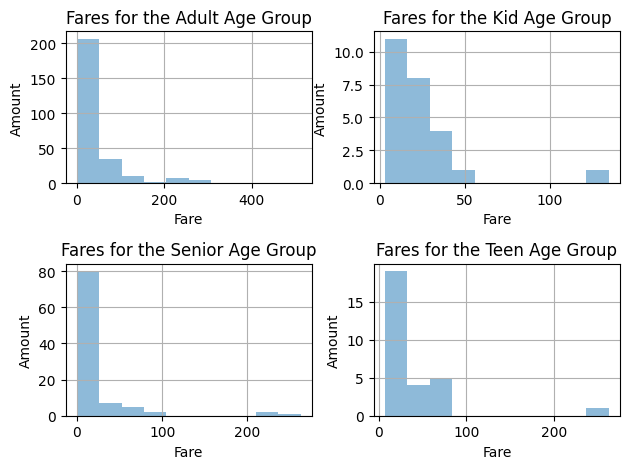

In [15]:
for age, (age_bin, group) in enumerate(tt_df.groupby('age_bin'), 1):
    plt.subplot(2, 2, age)
    group['fare'].hist(alpha=0.5)
    plt.xlabel('Fare')
    plt.ylabel('Amount')
    plt.title(f'Fares for the {age_bin} Age Group')

plt.tight_layout()
plt.show()

As we can see, the fare for the Adult and Senior age groups are skewed negatively slightly more than their Kid and Teen Age Group counterparts. This is due, in part, due to the outliers of the latter two peaking in the 260-280 fare bin——or range. Although these outliers pull the graphs more rightward than their mean/medians in the lower-hundred bins would suggest, they remain firmly anchored in those ranges, despite what the histogram of the Kid Age Group would suggest: it's simply scaled differently than the others.